In [1]:
#First let's import the necessary libraries 

import numpy as np

import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline 

In [2]:
#Reading in our dataset
advert = pd.read_csv('advertising.csv')

In [3]:
#let's check how how dataset looks like 

advert.sample(5)

TV  Radio  Newspaper  Sales
194  149.7   35.6        6.0   17.3
144   96.2   14.8       38.9   11.4
67   139.3   14.5       10.2   13.4
38    43.1   26.7       35.1   10.1
52   216.4   41.7       39.6   22.6

In [4]:
#let's look at the different information from our data 

advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
#Are there any null values in the data
#Great there are no null values
advert.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
#let's take a quick glimpse of the descriptive statistics of our dataset

advert.describe().transpose()

count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
Radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
Newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
Sales      200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0

# EXPLORATORY DATA ANAYLSIS

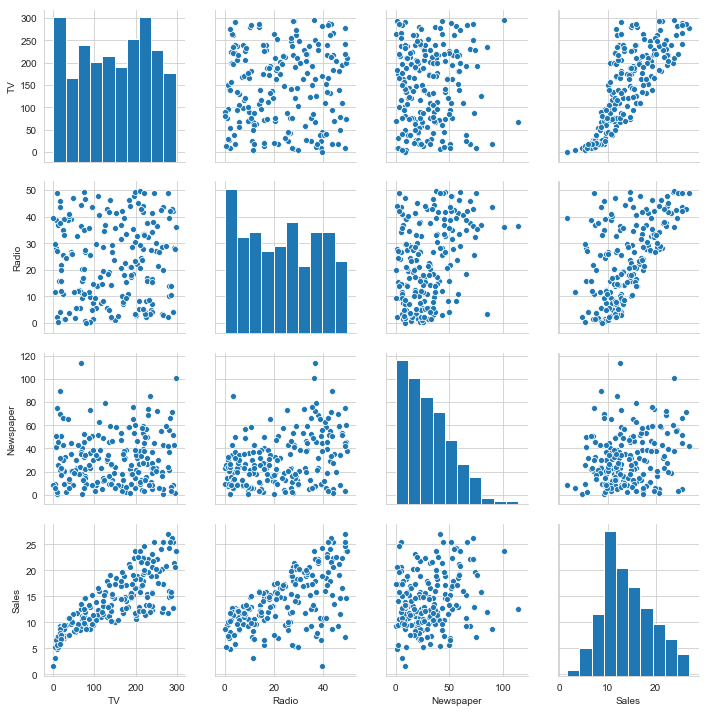

In [7]:
sns.pairplot(advert)

<Figure size 720x432 with 0 Axes>

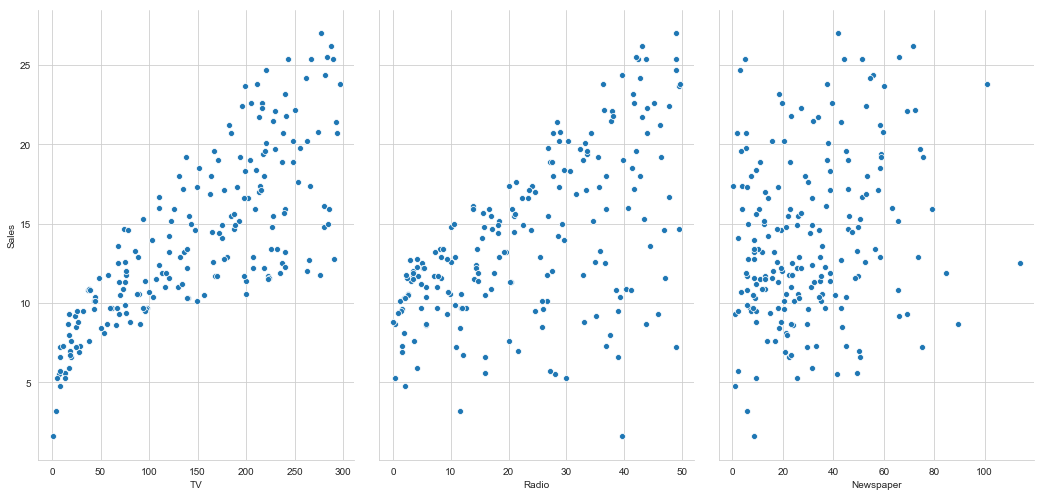

In [8]:
# Visualise the relationship between the features and the response using scatterplots
fig = plt.figure(figsize=(10,6))
sns.pairplot(advert, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',height=7, aspect=0.7, kind='scatter')

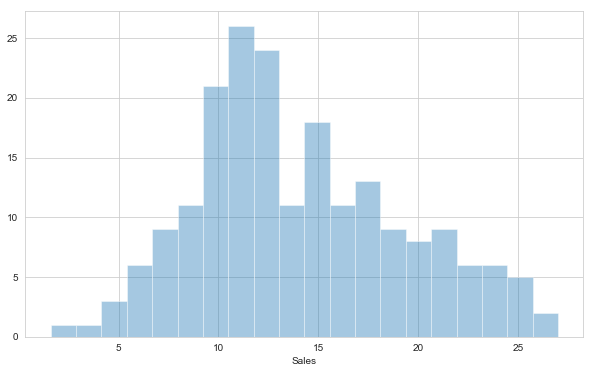

In [9]:
fig = plt.figure(figsize=(10,6))
sns.distplot(advert['Sales'],bins=20,kde=False)

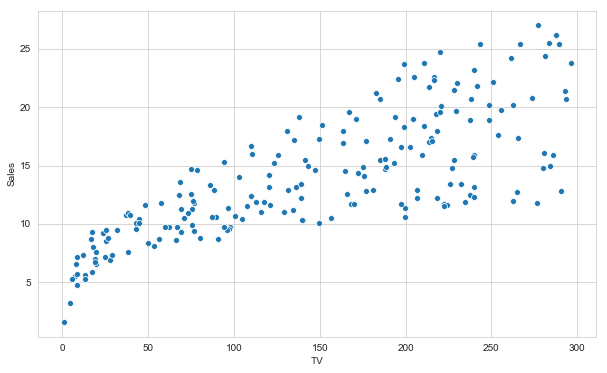

In [10]:
#There is a high realtionship between the sales and tv advertisement
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='TV',y='Sales',data=advert)

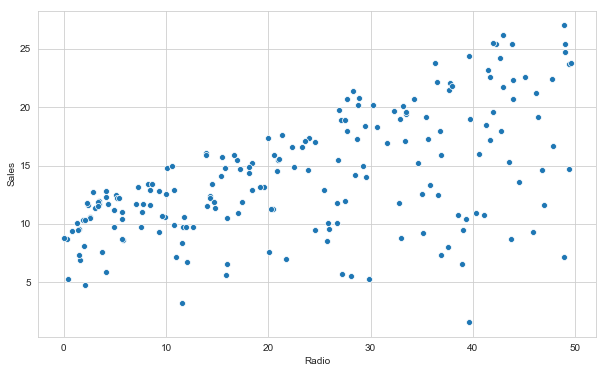

In [11]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Radio',y='Sales',data=advert)

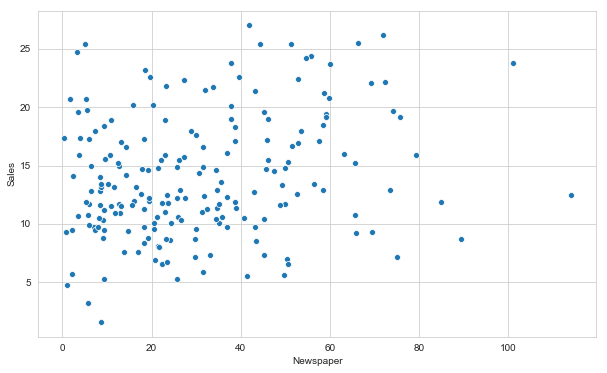

In [12]:
#there seems to be no realionship here 
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Newspaper',y='Sales',data=advert)

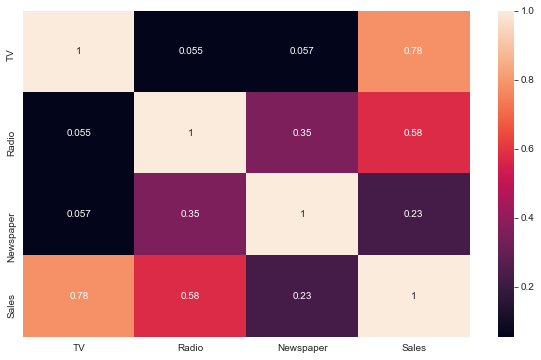

In [13]:
#let's exmine the correlation 
fig = plt.figure(figsize=(10,6))
sns.heatmap(advert.corr(),annot=True)

Text(0.5, 1.0, 'AMOUNT IN THOUSANDS ALLOCATED FOR ADVERTISEMENT')

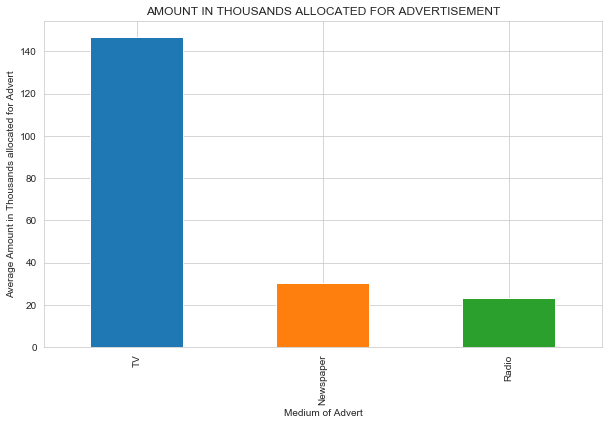

In [14]:
#What is the average budget allocated to each platform for advertisement

advert[['TV','Newspaper','Radio']].mean().plot(kind='bar',figsize=(10,6))
plt.xlabel('Medium of Advert')
plt.ylabel('Average Amount in Thousands allocated for Advert')
plt.title('AMOUNT IN THOUSANDS ALLOCATED FOR ADVERTISEMENT')

Text(0.5, 1.0, 'RelationShip Between the Sales and the Amount Allocated for Advertisement')

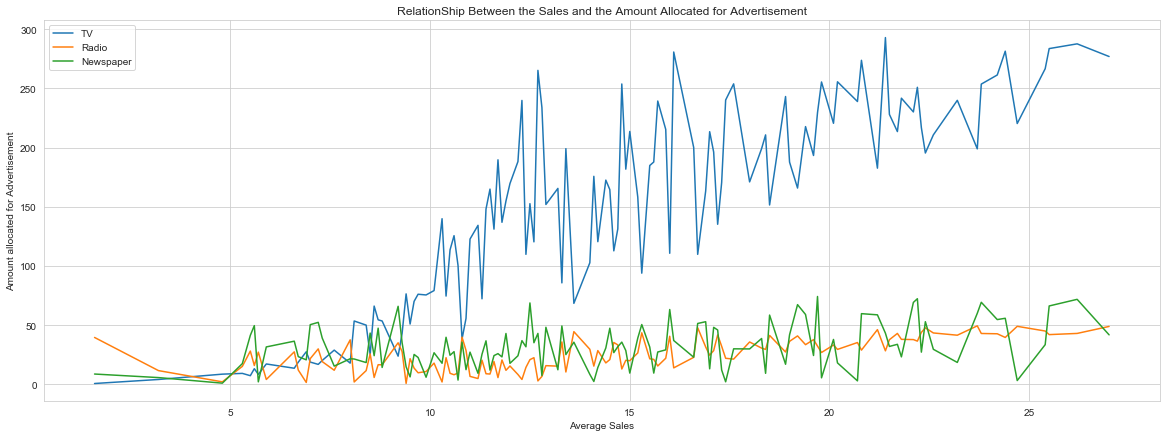

In [15]:
#From the trend it is evident as the budget allocation is increased then the sales also increase
advert.groupby('Sales').mean().plot(figsize=(20,7))
plt.xlabel('Average Sales')
plt.ylabel('Amount allocated for Advertisement')
plt.title('RelationShip Between the Sales and the Amount Allocated for Advertisement')

In [16]:
advert.groupby('Sales').mean().head()

TV  Radio  Newspaper
Sales                        
1.6    0.70  39.60        8.7
3.2    4.10  11.60        5.7
4.8    8.60   2.10        1.0
5.3    9.25  15.15       17.5
5.5    7.30  28.10       41.4

In [17]:
advert.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [18]:
import cufflinks as cf
cf.go_offline()

In [19]:
advert[['TV','Newspaper','Radio']].mean().iplot(kind='bar',title='AMOUNT IN THOUSANDS ALLOCATED FOR ADVERTISEMENT',xTitle='Medium of Advert',yTitle='Average Amount in Thousands allocated for Advert')

In [20]:
advert.groupby('Sales').mean().iplot(kind='line',title='RelationShip Between the Sales and the Amount Allocated for Advertisement',xTitle='Average Sales',yTitle='Amount allocated for Advertisement')

In [21]:
advert.iplot(kind='scatter',x='TV',y='Sales',mode='markers',size=10,xTitle='TV',yTitle='SALES')

# Building a Linear Regression Model 

### Split the Data into Training and Testing

In [22]:
#We need to first split the data for training and the other portion for testing our model
X = advert[['TV','Radio','Newspaper']]

y = advert['Sales']

In [23]:
#Get the necessary libraries to split the data 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=101)

### Perform the Linear Regession

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
#We can now create an instance of the Linear REgession and call it lm

lm = LinearRegression()

In [26]:
#We can now fit our training data to the model

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Let's Now Evaluate the Model We Built

In [27]:
#we start by printing the intercept
print(lm.intercept_)

3.217568856657895


In [28]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coefficient'])
coeff_df

Coefficient
TV            0.044584
Radio         0.185252
Newspaper    -0.001225

In [29]:
coeff_df.iplot(kind='bar',yTitle='COEFFICIENT THE SALES INCREASES BY')

In [30]:
#if my tv price increases by a unit it affect sales by 0.044584

### Let's Now Do Our Predictions with the Testing Data

In [31]:
#make predictions of the model by utilizind the test data 

y_pred = lm.predict(X_test)

### Let's Look at the Errors of the Model

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [33]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 2.348375242713826
r_square_value : 0.9231300835158753


Text(0, 0.5, 'y_pred')

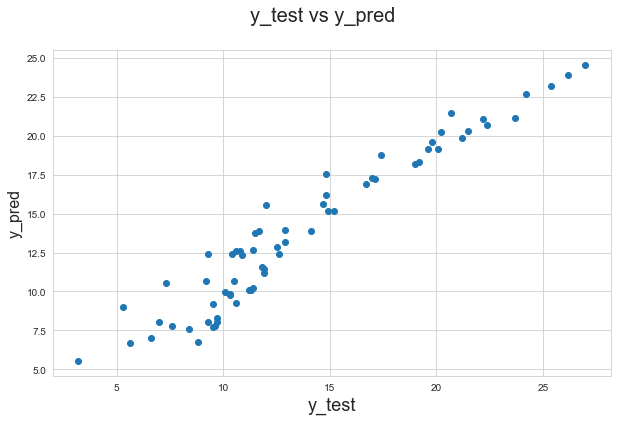

In [34]:
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

#### How Can we make our model better 

In [35]:
#First we import the necessary library
import statsmodels.api as sm

In [36]:
#unlike the linear regession model in stats model we have to manually add our constant
X_train_sm = X_train

X_train_sm = sm.add_constant(X_train_sm)

#now let's create an instance of the model

lm_1 = sm.OLS(y_train,X_train_sm).fit()

#We then Print to see the Coeefcients
lm_1.params

const        3.217569
TV           0.044584
Radio        0.185252
Newspaper   -0.001225
dtype: float64

In [37]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     320.0
Date:                Mon, 01 Jul 2019   Prob (F-statistic):           8.09e-60
Time:                        10:06:14   Log-Likelihood:                -264.18
No. Observations:                 134   AIC:                             536.4
Df Residuals:                     130   BIC:                             547.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2176      0.413      7.798      0.0

### We implement the results we got from looking at the p value and knowing which columns are significant for our model

When the p value is greater than 0.05 in this case the newspaper we can drop that from our model and run it again

In [38]:
#Let's Remove the newspaper from the model and run it

X_train_new = X_train[['TV','Radio']]

X_test_new = X_test[['TV','Radio']]

In [39]:
#Now we can fit our data to the model

lm.fit(X_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
#Let's Make the Predictions once again 

y_pred_new = lm.predict(X_test_new)

In [41]:
y_test.shape

(66,)

Text(0, 0.5, 'PREDICTIONS')

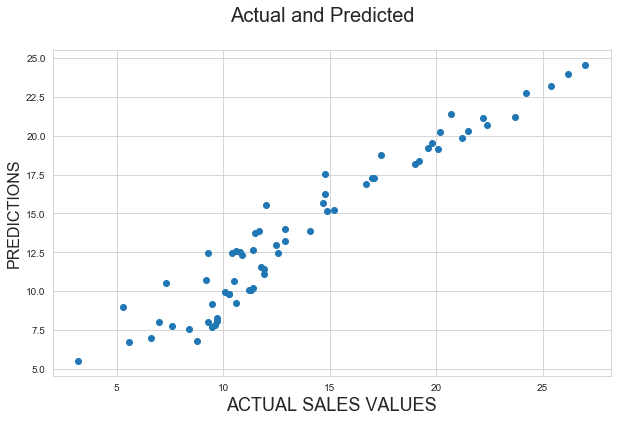

In [42]:
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_new)
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('ACTUAL SALES VALUES', fontsize=18)                               # X-label
plt.ylabel('PREDICTIONS', fontsize=16)

Text(0, 0.5, 'Sales')

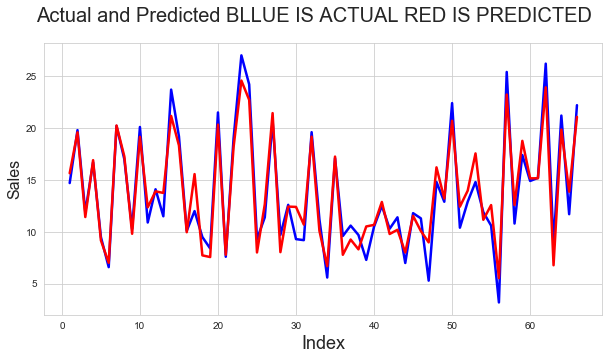

In [43]:
c = [i for i in range(1,67,1)]
fig = plt.figure(figsize=(10,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted BLLUE IS ACTUAL RED IS PREDICTED', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)

Text(0, 0.5, 'ytest-ypred')

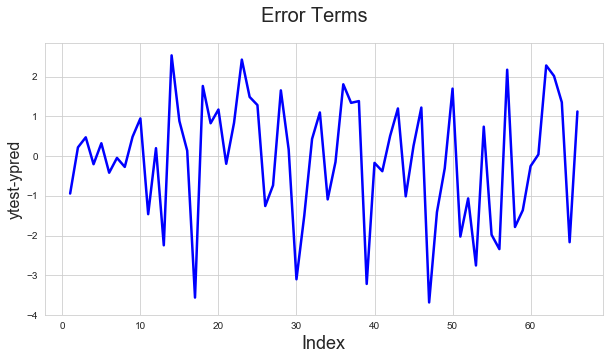

In [44]:
# Error terms
c = [i for i in range(1,67,1)]
fig = plt.figure(figsize=(10,5))
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16) 

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
mse_new = mean_squared_error(y_test, y_pred_new)
r_squared_new = r2_score(y_test, y_pred_new)

In [46]:
print('Mean_Squared_Error :' ,mse_new)
print('r_square_value :',r_squared_new)

Mean_Squared_Error : 2.348154063475312
r_square_value : 0.9231373234276591
